<a href="https://colab.research.google.com/github/hau17/ptdl-python/blob/main/DA04/Feature_Engineering_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST DATASET


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import kagglehub
import pandas as pd


## MNIST Dataset




In [ ]:

file_path = "mnist_train.csv"
dataset_slug = "oddrationale/mnist-in-csv"
dataset_path = kagglehub.dataset_download(dataset_slug, file_path)
mnist_train_df = pd.read_csv(dataset_path)
# In ra 5 dòng đầu tiên để kiểm tra
digits = datasets.load_digits()
n_samples = len(digits.images)
print('The number of samples:', n_samples)

Using Colab cache for faster access to the 'mnist-in-csv' dataset.
The number of samples: 1797


In [ ]:
print('Shape of digit samples:', digits.images.shape)

Shape of digit samples: (1797, 8, 8)


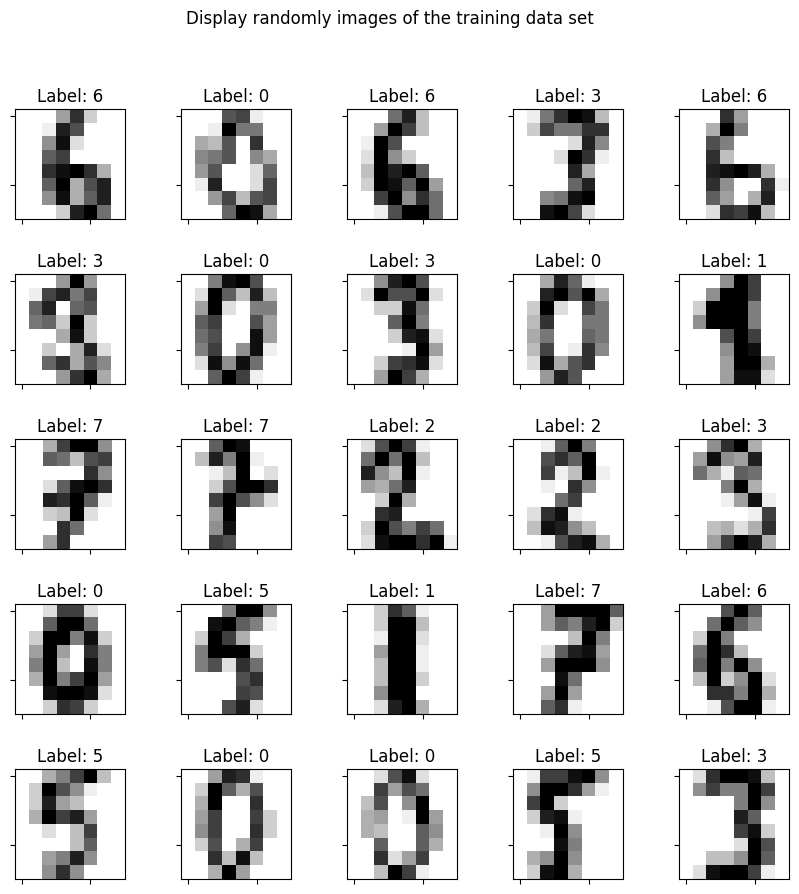

In [ ]:
def display_digits(X, Y):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
    fig.suptitle( "Display randomly images of the training data set")
    for i in range(5):
        for j in range(5):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :]# .reshape(8, 8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
# Split data into 50% train and 50% test subsets

X_train, X_test, y_train, y_test = train_test_split(digits.images,
                                                    digits.target,
                                                    test_size=0.2,
                                                    random_state=200,
                                                    shuffle=False)
display_digits(X_train, y_train)

Mô tả
* Đây là một lưới $5 \times 5$ hiển thị 25 hình ảnh chữ số viết tay được lấy ngẫu nhiên từ tập huấn luyện (X_train)1111. Mỗi ô hiển thị hình ảnh $8\times8$ pixel màu thang độ xám (cmap='gray_r') và nhãn tương ứng (Label) ở phía trên.

Mục đích
* Giúp người dùng trực quan hóa và hiểu cấu trúc của dữ liệu đầu vào. Nó minh họa các biến thể khác nhau trong cách viết của cùng một chữ số (ví dụ: chữ số '3' hoặc '5') và xác nhận rằng dữ liệu là hình ảnh có độ phân giải thấp ($8\times8$).

Phân tích
* Các hình ảnh này là dạng thô, được mô hình sử dụng để học. Mặc dù độ phân giải thấp, mắt người vẫn có thể nhận diện được hầu hết các chữ số, xác nhận tính khả thi của nhiệm vụ phân loại.

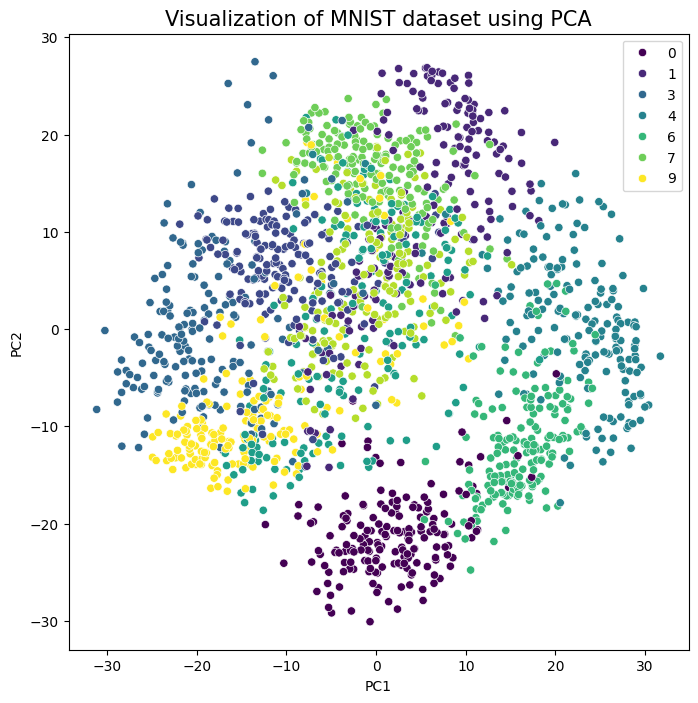

In [ ]:
from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
pca = PCA(n_components=2)
# Fit and transform the data to the model
reduced_data_rpca = pca.fit_transform(digits.data)
# Create a regular PCA model
pca = PCA(n_components=2)
# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)
plt.figure(figsize=(8, 8))
_ = sns.scatterplot(x=reduced_data_pca[:, 0],
y=reduced_data_pca[:, 1],
hue=digits.target,
palette='viridis')
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.title('Visualization of MNIST dataset using PCA', {'fontsize'
: 15})

Mô tả
* Đây là biểu đồ phân tán (scatter plot) hiển thị toàn bộ dữ liệu MNIST sau khi đã được giảm xuống 2 chiều bằng Phân tích Thành phần Chính (PCA). Trục hoành là PC1 và trục tung là PC2. Mỗi điểm màu đại diện cho một mẫu chữ số, màu sắc xác định nhãn của chữ số đó (0 đến 9).

Mục đích
* Trực quan hóa cấu trúc của dữ liệu đa chiều ($8\times8=64$ chiều) trong không gian 2D, giúp đánh giá khả năng phân tách của các lớp chữ số.

Phân tích
* Phân cụm (Clustering): Một số lớp (như 0, 1, 9) có vẻ phân cụm tương đối tách biệt (ví dụ: lớp 1 và 9 nằm ở góc trên bên trái; lớp 0 phân tán hơn).
* Chồng lấn (Overlap): Nhiều lớp chữ số chồng lấn đáng kể ở khu vực trung tâm của biểu đồ (ví dụ: 3, 4, 5, 6, 7, 8). Điều này cho thấy rằng chỉ sử dụng 2 thành phần chính (PC1 và PC2) không đủ để phân tách hoàn toàn 10 lớp chữ số, và sự nhầm lẫn giữa các chữ số có hình dạng tương tự là điều khó tránh khỏi.

## Modeling and Results

In [ ]:
# Flatten the images

X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

In [ ]:
# ===========================
# Create a classifier here
# Example: This example, we use Logistic Regressor
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2',
fit_intercept=True,
random_state=2021,
solver='lbfgs',
max_iter=100,
verbose=1,
n_jobs=5,)

In [ ]:
# Learn the digits on the train subset

clf.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


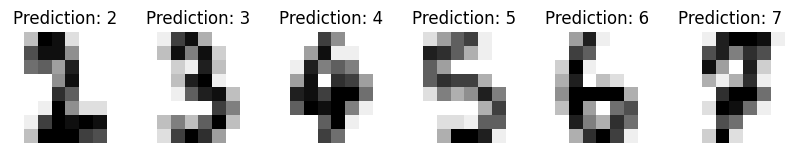

In [ ]:
# Show predictions

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Mô tả
* Một hàng gồm 6 hình ảnh chữ số từ tập kiểm tra (X_test). Dưới mỗi hình ảnh là nhãn được dự đoán bởi mô hình Logistic Regression (ví dụ: Prediction: 2, Prediction: 3,...).

Mục đích
* Cung cấp cái nhìn trực quan về khả năng dự đoán của mô hình trên các mẫu mới.

Phân tích
* Các ví dụ được hiển thị đều cho thấy mô hình dự đoán chính xác (chữ số hình ảnh khớp với nhãn dự đoán).

## Model Evaluation

In [ ]:
print(f"Classification report for classifier {clf}:\n"

f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(n_jobs=5, random_state=2021, verbose=1):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.79      0.83      0.81        36
           2       1.00      1.00      1.00        35
           3       0.93      0.76      0.84        37
           4       0.97      0.92      0.94        37
           5       0.90      0.95      0.92        37
           6       0.97      0.97      0.97        37
           7       0.97      0.94      0.96        36
           8       0.78      0.88      0.83        33
           9       0.80      0.89      0.85        37

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360




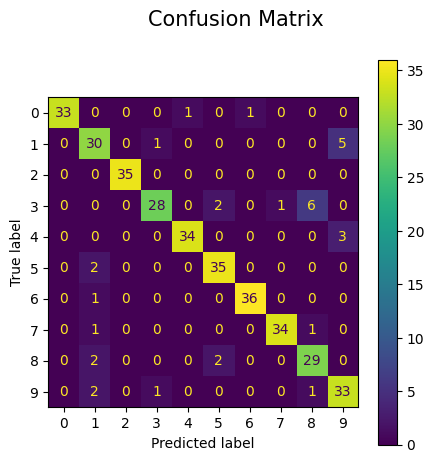

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(5, 5))

ax = plt.gca()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax)
_ = disp.figure_.suptitle("Confusion Matrix", fontsize=15)

Mô tả
* Ma trận $10 \times 10$ (từ 0 đến 9) hiển thị số lượng mẫu True label (nhãn thực tế, trục dọc) được dự đoán thành Predicted label (nhãn dự đoán, trục ngang).

Mục đích
* Đánh giá chi tiết hiệu suất của mô hình Logistic Regression, đặc biệt là xác định các lớp bị nhầm lẫn.

Phân tích
* Đường chéo chính: Các ô trên đường chéo chính (màu sáng) hiển thị số lượng dự đoán đúng. Ví dụ: Chữ số '2' được dự đoán đúng 35 lần.
* Nhầm lẫn (Lỗi): Các ô ngoài đường chéo chính (màu tối hơn) hiển thị số lượng dự đoán sai.

# END